This notebook generates confidence intervals on scores predicted based on the initial shape of learning curves.
For larger cohorts, these predictions can be checked against actual accuracy at increasing sample sizes.

In [176]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.optimize import curve_fit
import numpy as np # need for linspace in plot
from statistics import mean
import statistics
import time
import math
import json
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
pd.options.display.max_rows = 500

In [2]:
colors = pd.read_csv('../result_stitching/TMP_cohort_colors_n26_20210228.csv',
                     sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

In [3]:
# Devel, single cancer
BRCA_10_paths = sorted(
    glob.glob('../20210724_exacloud_results/BRCA*.tsv'))
BRCA_5_paths = sorted(
    glob.glob('../results_5/BRCA*.tsv'))

In [4]:
BRCA_dict = {}

ten_keys = []
ten_scores = []
for path in BRCA_10_paths:
    file = pd.read_csv(path, sep = '\t')
    step_size = int(path.split('.')[5])
    
    test = file[file['Test'] == 1].copy()
    
    ten_scores_n = []
    for i in test.Resampling.unique():
        scoreDF = test[test.Resampling == i]
        score = f1_score(scoreDF.iloc[:,4],
                 scoreDF.iloc[:,5],
                 average='weighted')
        ten_scores_n.append(score)
    BRCA_dict[step_size] = ten_scores_n
    
five_keys = []
five_scores = []
for path in BRCA_5_paths:
    file = pd.read_csv(path, sep = '\t')
    step_size = int(path.split('.')[5])
    
    test = file[file['Test'] == 1].copy()
    
    five_scores_n = []
    for i in test.Resampling.unique():
        scoreDF = test[test.Resampling == i]
        score = f1_score(scoreDF.iloc[:,4],
                 scoreDF.iloc[:,5],
                 average='weighted')
        five_scores_n.append(score)
    five_scores.append(five_scores_n)
    BRCA_dict[step_size] = five_scores_n

In [5]:
BRCA_object = sorted(BRCA_dict.items())

In [ ]:
BRCA_object # List of sample size with corresponding score list n = 100 as tuples 
# End Devel

In [77]:
# Production
path_list = sorted(glob.glob('../results_5/*.tsv'))
cohort_list = []
for path in path_list:
    cohort = path.split('/')[2].split('.')[0]
    if cohort not in cohort_list:
        cohort_list.append(cohort)

In [78]:
sample_response_DF = pd.DataFrame(index = cohort_list)
sample_response_DF['Cohort'] = 'x'
sample_response_DF['Sample_size_100_accuracies'] = 'y'
for cohort_idx, cohort in enumerate(cohort_list):
    print(cohort)
    paths_10 = sorted(
    glob.glob('../20210724_exacloud_results/'+cohort+'*.tsv'))
    
    cohort_dict = {}
    
    ten_keys = []
    ten_scores = []
    for path in paths_10:
        file = pd.read_csv(path, sep = '\t')
        step_size = int(path.split('.')[5])

        test = file[file['Test'] == 1].copy()

        ten_scores_n = []
        for i in test.Resampling.unique():
            scoreDF = test[test.Resampling == i]
            score = f1_score(scoreDF.iloc[:,4],
                     scoreDF.iloc[:,5],
                     average='weighted')
            ten_scores_n.append(score)
        cohort_dict[step_size] = ten_scores_n

    paths_5 = sorted(
    glob.glob('../results_5/'+cohort+'*.tsv'))
        
    five_keys = []
    five_scores = []
    for path in paths_5:
        file = pd.read_csv(path, sep = '\t')
        step_size = int(path.split('.')[5])

        test = file[file['Test'] == 1].copy()

        five_scores_n = []
        for i in test.Resampling.unique():
            scoreDF = test[test.Resampling == i]
            score = f1_score(scoreDF.iloc[:,4],
                     scoreDF.iloc[:,5],
                     average='weighted')
            five_scores_n.append(score)
        five_scores.append(five_scores_n)
        cohort_dict[step_size] = five_scores_n
    cohort_dict = dict(sorted(cohort_dict.items(), key=lambda item: item[1]))
    sample_response_DF.iloc[cohort_idx, 0] = cohort
    sample_response_DF.iloc[cohort_idx, 1] = json.dumps(cohort_dict)
#     break
print('done')

ACC
BLCA
BRCA
CESC
COADREAD
ESCC
GEA
HNSC
KIRCKICH
KIRP
LGGGBM
LIHCCHOL
LUAD
LUSC
MESO
OV
PAAD
PCPG
PRAD
SARC
SKCM
TGCT
THCA
THYM
UCEC
UVM
done


In [79]:
sample_response_DF.head()

,Cohort,Sample_size_100_accuracies
ACC,ACC,"{""5"": [0.34285714285714286, 0.6901098901098901..."
BLCA,BLCA,"{""5"": [0.0, 0.8, 0.901010101010101, 0.35606060..."
BRCA,BRCA,"{""5"": [0.4499999999999999, 0.8967032967032967,..."
CESC,CESC,"{""5"": [0.6329966329966329, 1.0, 0.52, 0.355555..."
COADREAD,COADREAD,"{""15"": [0.30416666666666664, 0.713043478260869..."


In [81]:
sample_response_DF.to_csv('sample_response_DF_20210805.tsv',
                         sep = '\t', index = False)

In [83]:
sample_response_DF_read_test = pd.read_csv('sample_response_DF_20210805.tsv',
                                          sep = '\t')

In [84]:
sample_response_DF_read_test.head() # Looks good

,Cohort,Sample_size_100_accuracies
0,ACC,"{""5"": [0.34285714285714286, 0.6901098901098901..."
1,BLCA,"{""5"": [0.0, 0.8, 0.901010101010101, 0.35606060..."
2,BRCA,"{""5"": [0.4499999999999999, 0.8967032967032967,..."
3,CESC,"{""5"": [0.6329966329966329, 1.0, 0.52, 0.355555..."
4,COADREAD,"{""15"": [0.30416666666666664, 0.713043478260869..."


In [85]:
extract_test = json.loads(sample_response_DF_read_test.iloc[0,1])

In [ ]:
extract_test # Looks good

In [55]:
extract = json.loads(sample_response_DF.iloc[0,1]) # For main script starting point

In [ ]:
# Example convert key strings to integer
d = {int(k):[int(i) for i in v] for k,v in d.items()}

In [57]:
extract = {int(k):[i for i in v] for k,v in extract.items()} # Main step 2

In [17]:
cohort_list_index

0

In [ ]:
# Write summary object - done
# Put on Synapse - not done

In [ ]:
# Begin Analysis Devel

In [61]:
BRCA_extract = json.loads(sample_response_DF.iloc[2,1])

In [62]:
# Good
BRCA_extract = {int(k):[i for i in v] for k,v in json.loads(sample_response_DF.iloc[2,1]).items()}

In [7]:
BRCA_extract = BRCA_dict # step in after kernel crash (devel)

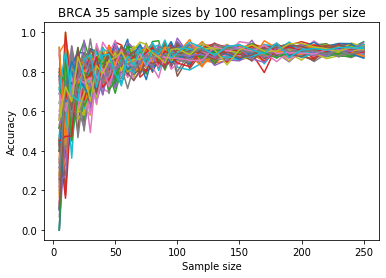

In [8]:
# Look at the 100 raw scores per sample size
BRCA_object = sorted(BRCA_dict.items()) # sorted by key, return a list of tuples

BRCA_x, BRCA_y = zip(*BRCA_object) # unpack a list of pairs into two tuples

plt.plot(BRCA_x, BRCA_y)
plt.title('BRCA 35 sample sizes by 100 resamplings per size')
plt.xlabel('Sample size')
plt.ylabel('Accuracy')
plt.savefig('BRCA_proto')
plt.show()

In [9]:
lower = [0,-1000,-1]
upper = [.5,1000,0]

def Y_acc(x, a, b, c): # x is sample size
    Y_acc = (1-a)-b*x**c
    return Y_acc

In [10]:
parameter_dict = {} # Parameter dict
for resampling_idx in list(range(0,100)): # loop of 100, index dict values
    
#     break
    scores_temp = []
    
    for tuple_n in BRCA_object:
        scores_temp.append(tuple_n[1][resampling_idx])    
    
    params, _ = curve_fit(Y_acc, # function, good, benchmark with other paper
                          
                     list(BRCA_extract.keys()), # keys in dict
                     scores_temp, # value_index 
                     bounds=[lower,upper])
    parameter_dict[resampling_idx] = params # add to parameter dict
fitDF = pd.DataFrame(parameter_dict).transpose()
# fitDF.columns = ['a','b','c']
fitDF.columns = ['Min_achvble_err','Lrn_rate','Dcay_rate']

In [91]:
fitDF.head(100)

,Min_achvble_err,Lrn_rate,Dcay_rate
0,1.422159e-13,0.404827,-0.221081
1,1.297823e-01,-0.087259,-1.000000
2,4.363641e-02,0.330754,-0.282571
3,3.040363e-11,0.300733,-0.152743
4,4.103633e-13,0.395340,-0.199069
5,2.915734e-17,0.320961,-0.177694
6,1.355912e-13,0.666134,-0.340189
7,7.009514e-14,0.572406,-0.288323
8,8.399752e-14,0.504736,-0.250601
9,3.432768e-12,0.442114,-0.222885


In [12]:
# Confidence interval on Min_achvble_err
# xbar is sample mean
# z is 1.96 for 95%
# s is sample standard deviation, package?
# n is sample size
xbar = mean(fitDF.Min_achvble_err)
z = 1.96 
s = statistics.stdev(fitDF.Min_achvble_err)
n = len(fitDF.Min_achvble_err)
CI_upper = xbar + z * (s/math.sqrt(n))
CI_lower = xbar - z * (s/math.sqrt(n))
print(CI_upper, CI_lower)

0.0044813089105982685 -0.000873121622270162


In [13]:
100-.00448 # Lower bound on maximal achievable error with

99.99552

In [14]:
cohort = 'BRCA'

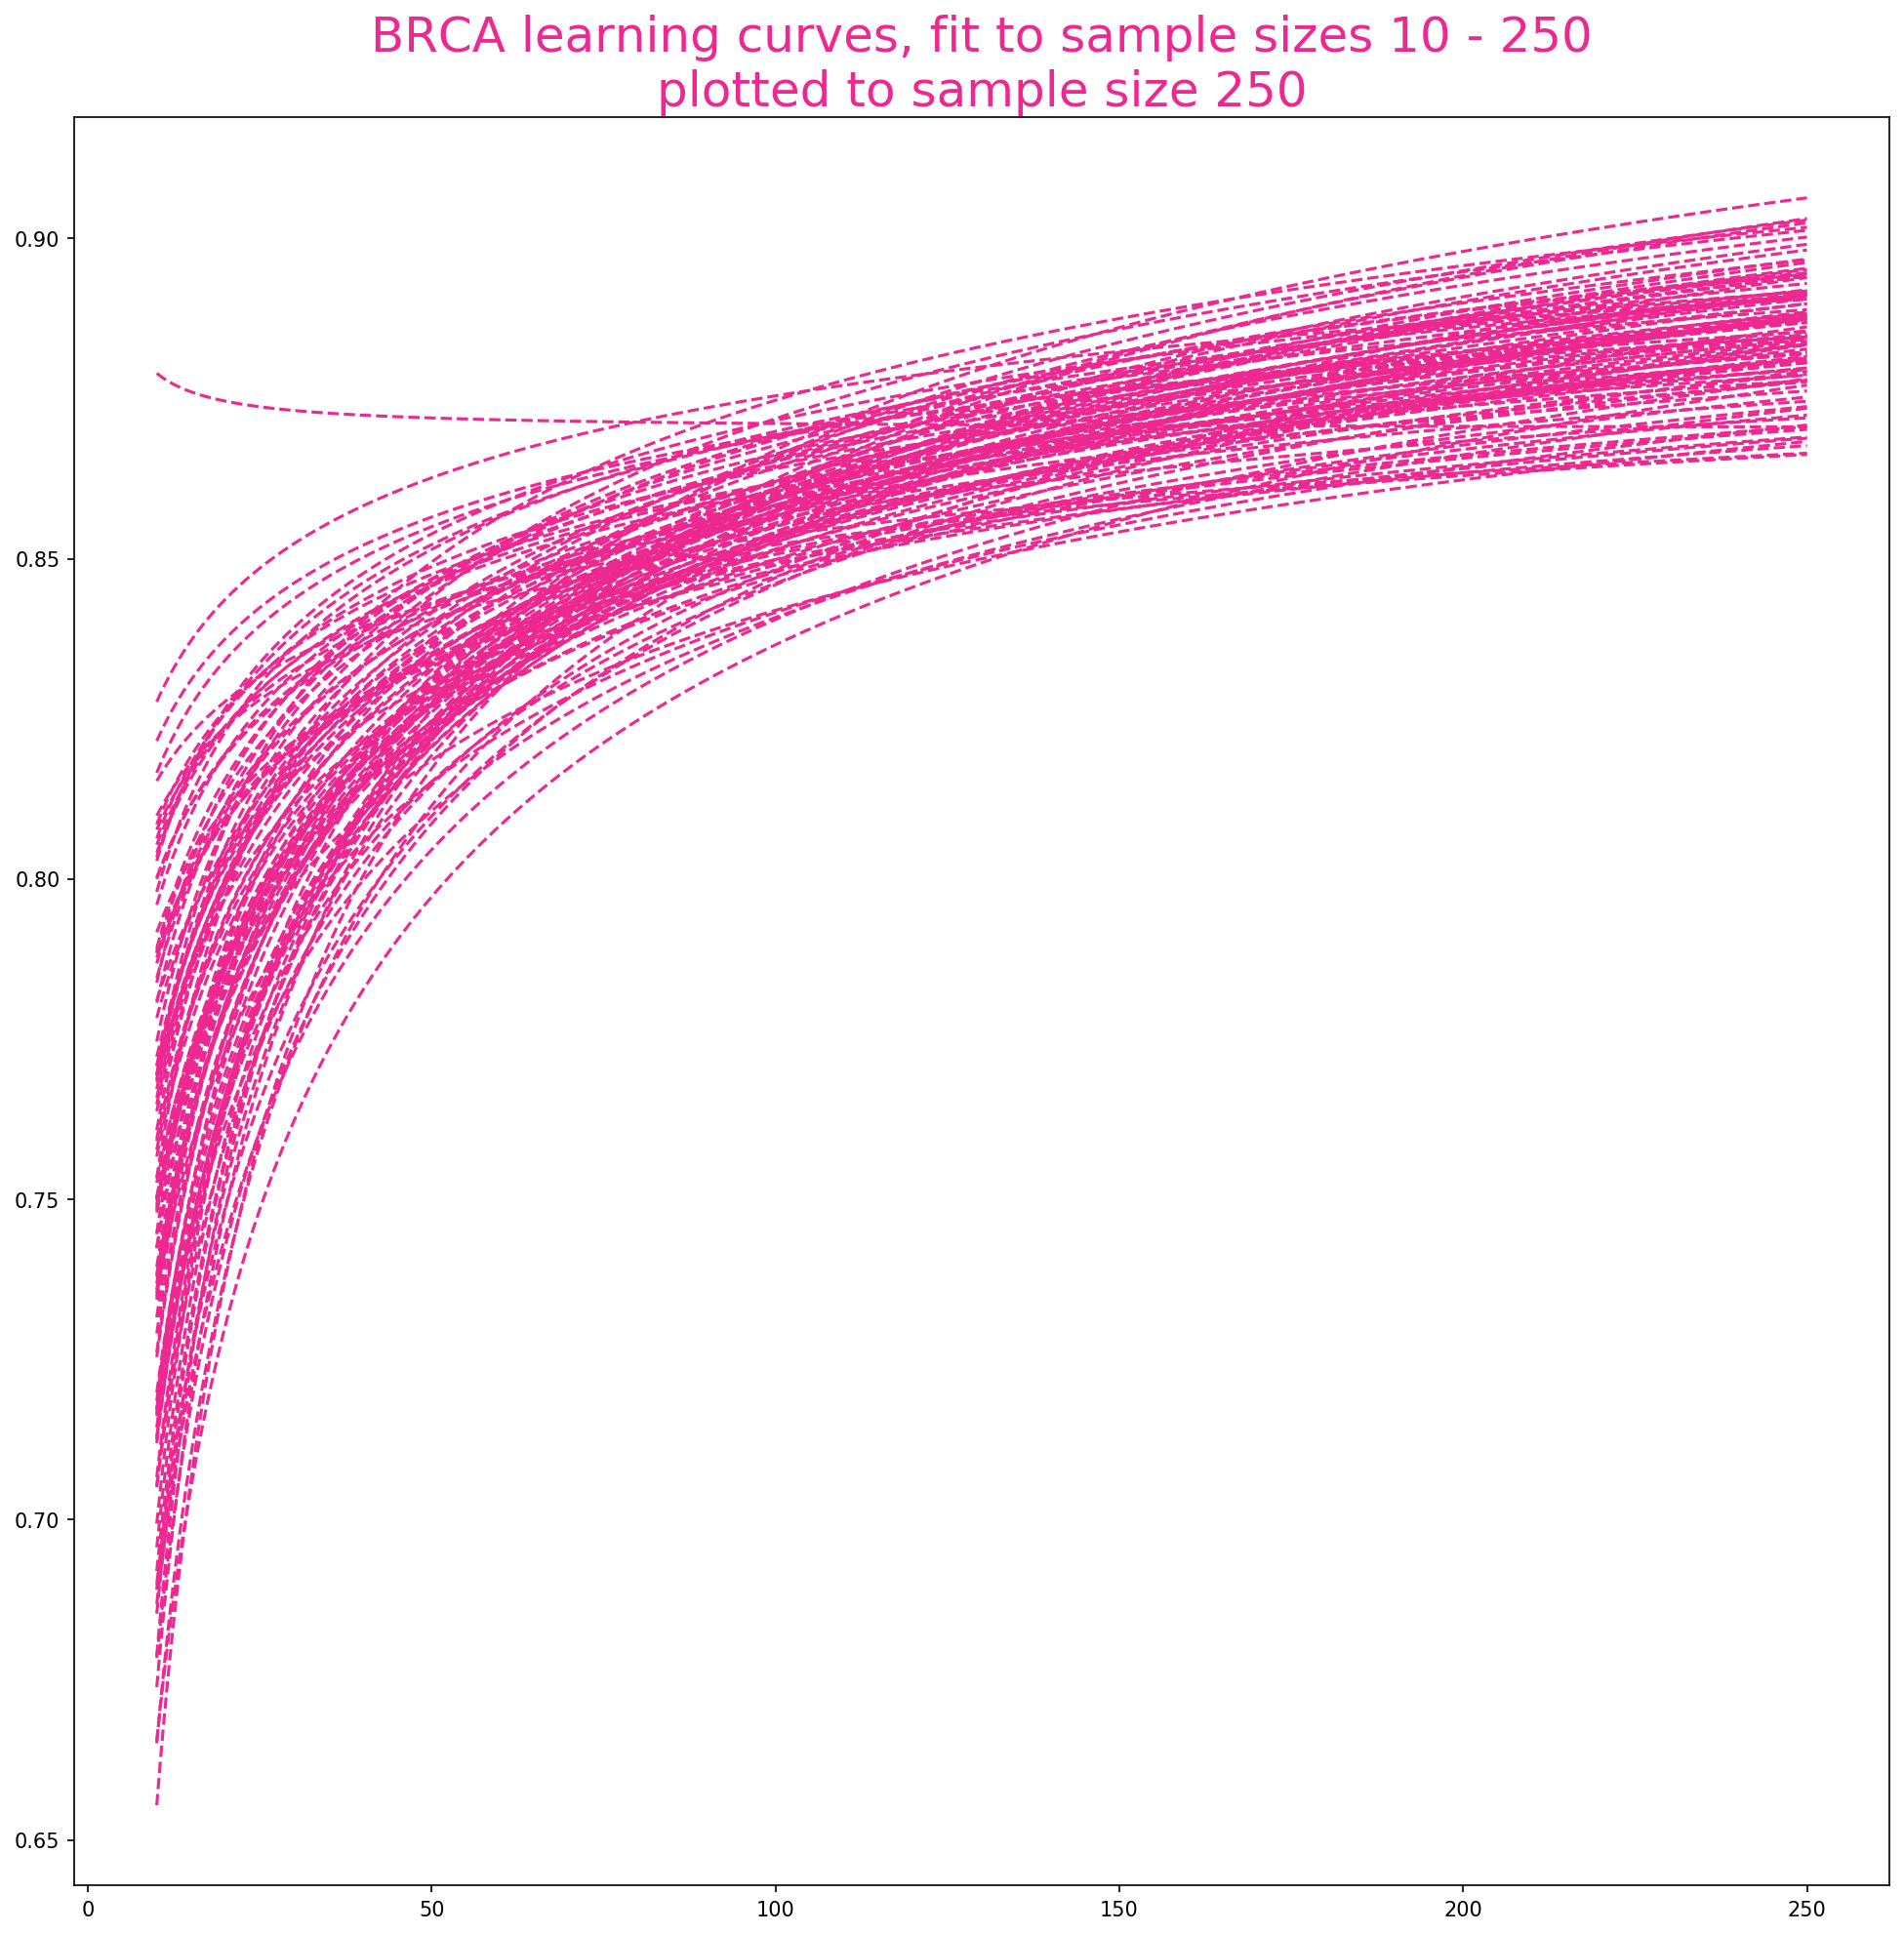

In [15]:
fig, ax = plt.subplots(figsize = (16,16), dpi = 150)
for resampling_idx in list(range(0,100)):
    color_shard = colors[colors.Cohort == cohort]
    colr = color_shard.iloc[0,1]
    
    scores_temp = []
    
    for tuple_n in BRCA_object:
        scores_temp.append(tuple_n[1][resampling_idx])
        
    f, _ = curve_fit(Y_acc,
                     list(BRCA_extract.keys()),
                     scores_temp,
                     bounds=[lower,upper])
    x = np.linspace(10, 250, 1000)
    y = Y_acc(x, *f)  
    ax.plot(x, y, '--', color=colr)
plt.title(
    'BRCA learning curves, fit to sample sizes 10 - 250\nplotted to sample size 250',
    color=colr, fontsize = 24)
plt.savefig('BRCA_to_250.png')

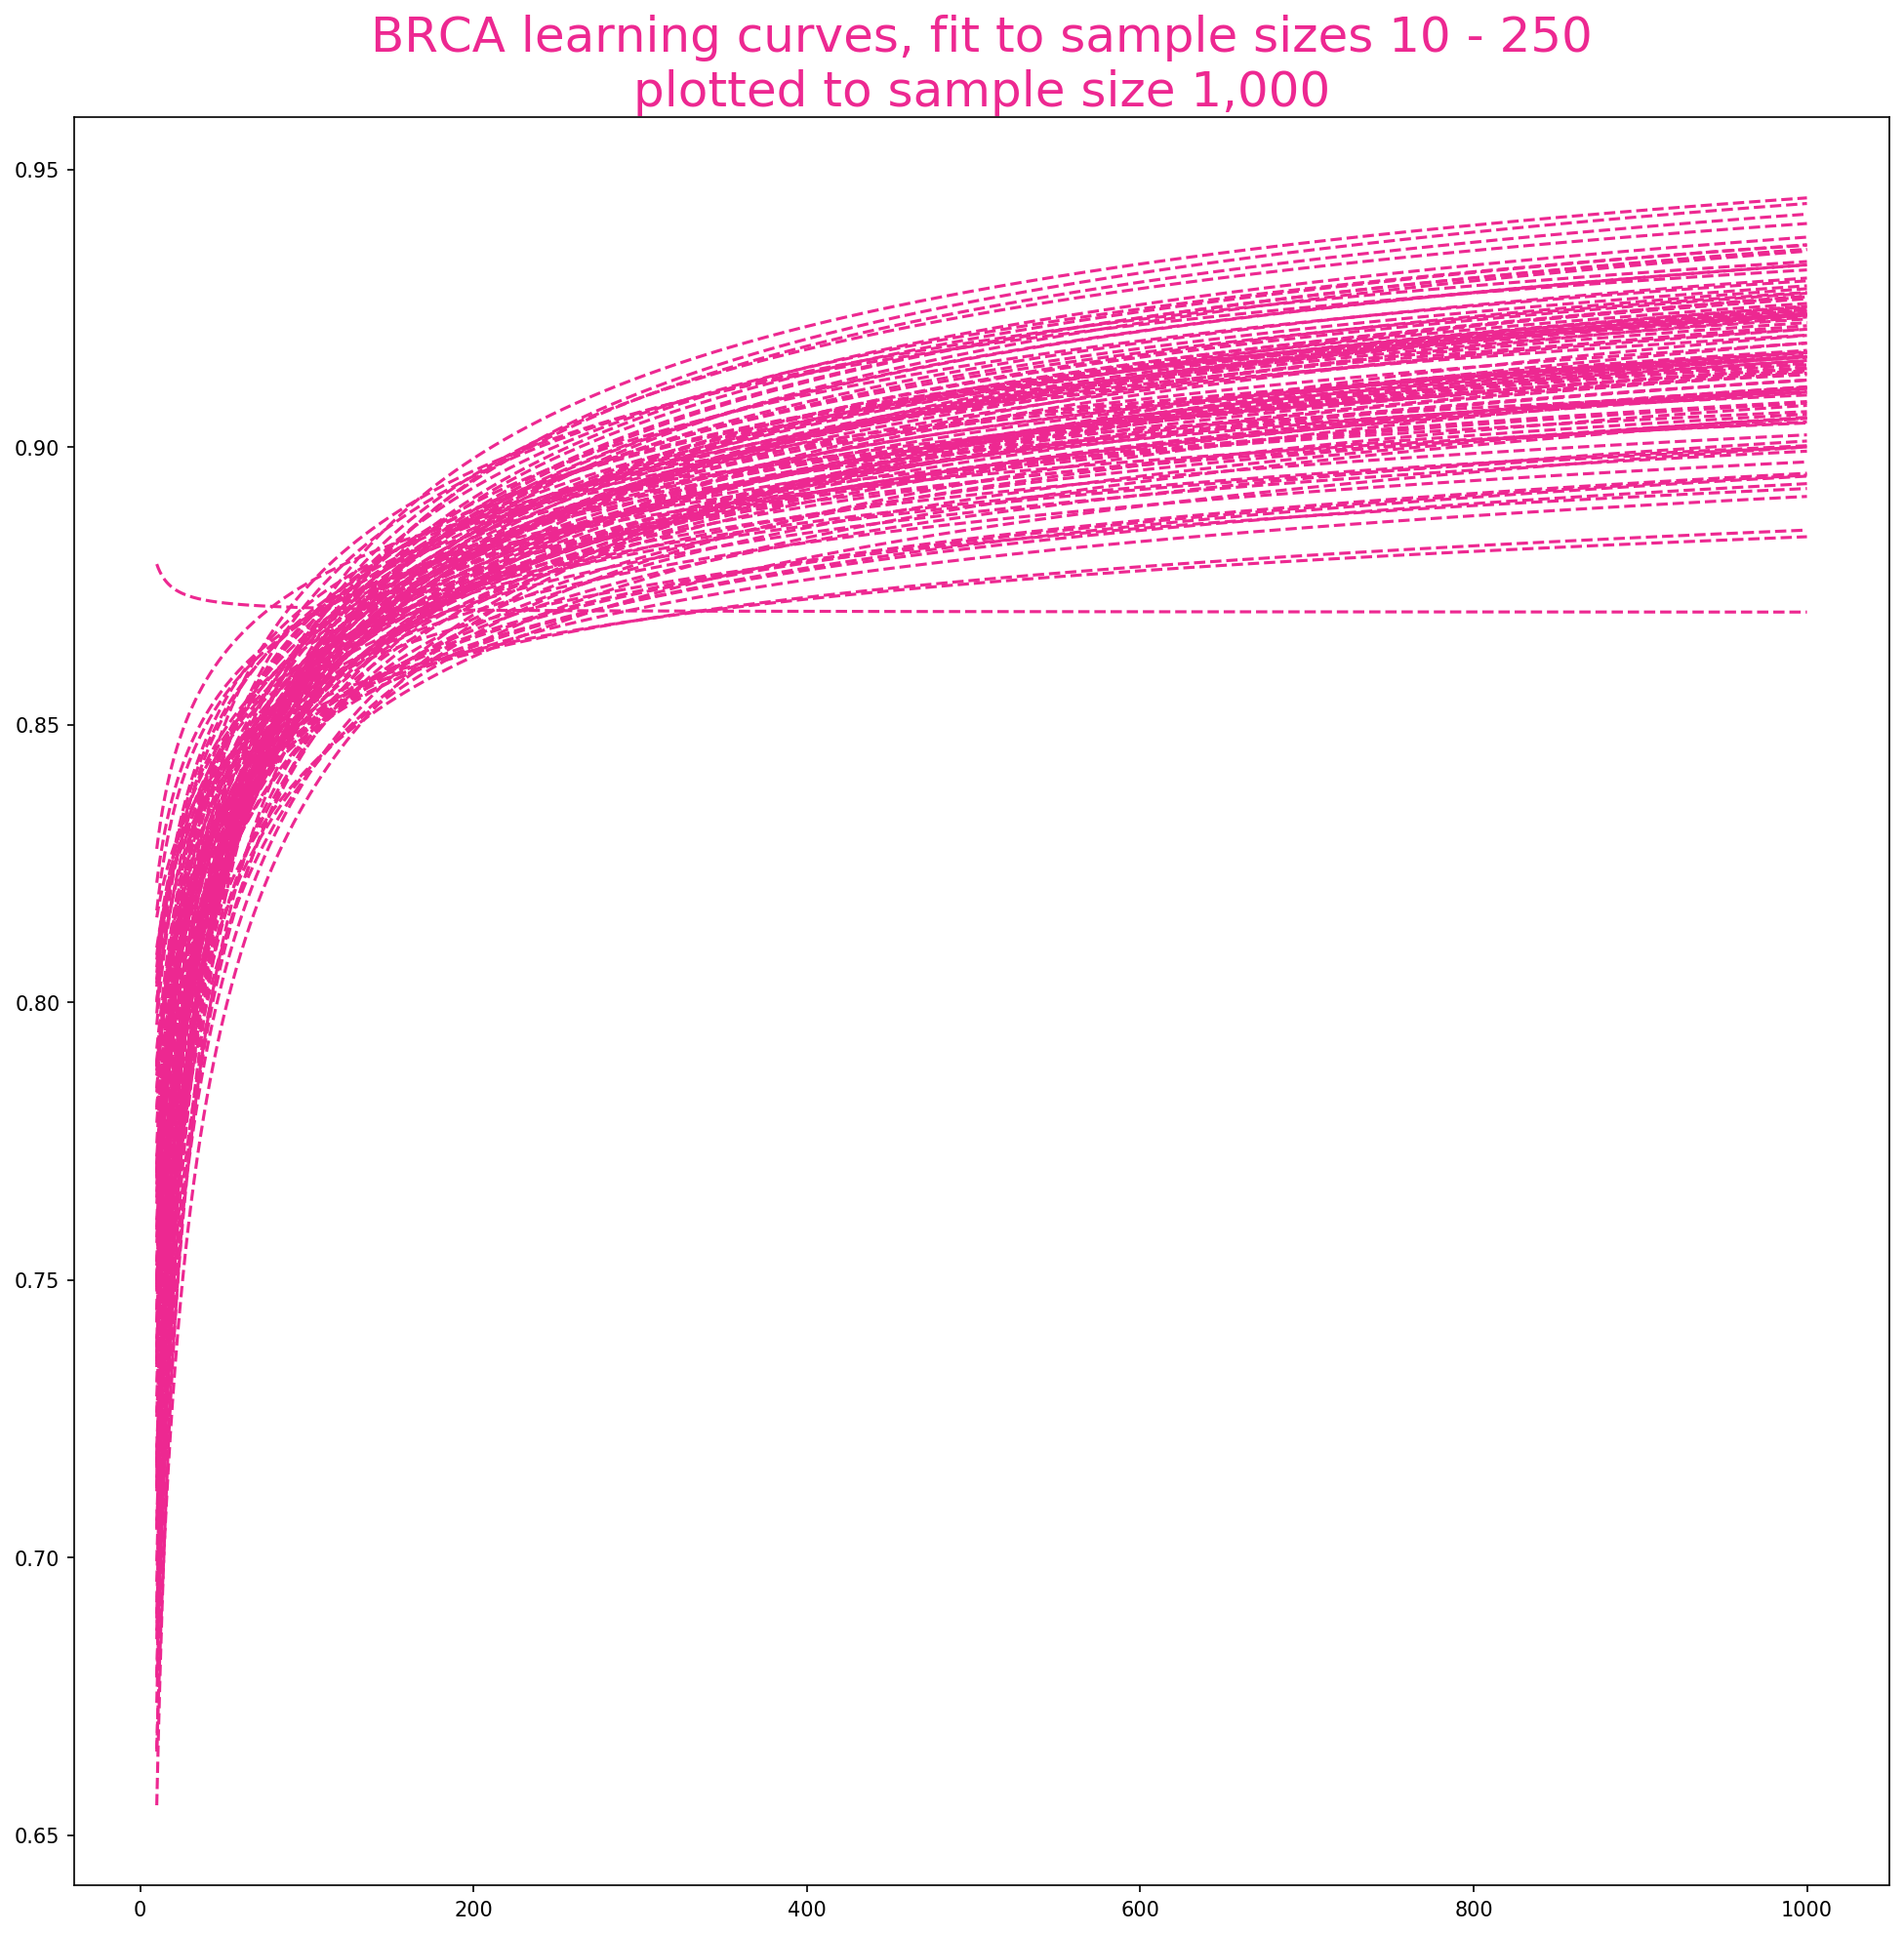

In [16]:
fig, ax = plt.subplots(figsize = (16,16), dpi = 150)
for resampling_idx in list(range(0,100)):
    color_shard = colors[colors.Cohort == cohort]
    colr = color_shard.iloc[0,1]
    
    scores_temp = []
    
    for tuple_n in BRCA_object:
        scores_temp.append(tuple_n[1][resampling_idx])
        
    f, _ = curve_fit(Y_acc,
                     list(BRCA_extract.keys()),
                     scores_temp,
                     bounds=[lower,upper])
    x = np.linspace(10, 1000, 10000)
    y = Y_acc(x, *f)  
    ax.plot(x, y, '--', color=colr)
plt.title(
    'BRCA learning curves, fit to sample sizes 10 - 250\nplotted to sample size 1,000',
    color=colr, fontsize = 24)
plt.savefig('BRCA_to_1,000.png')

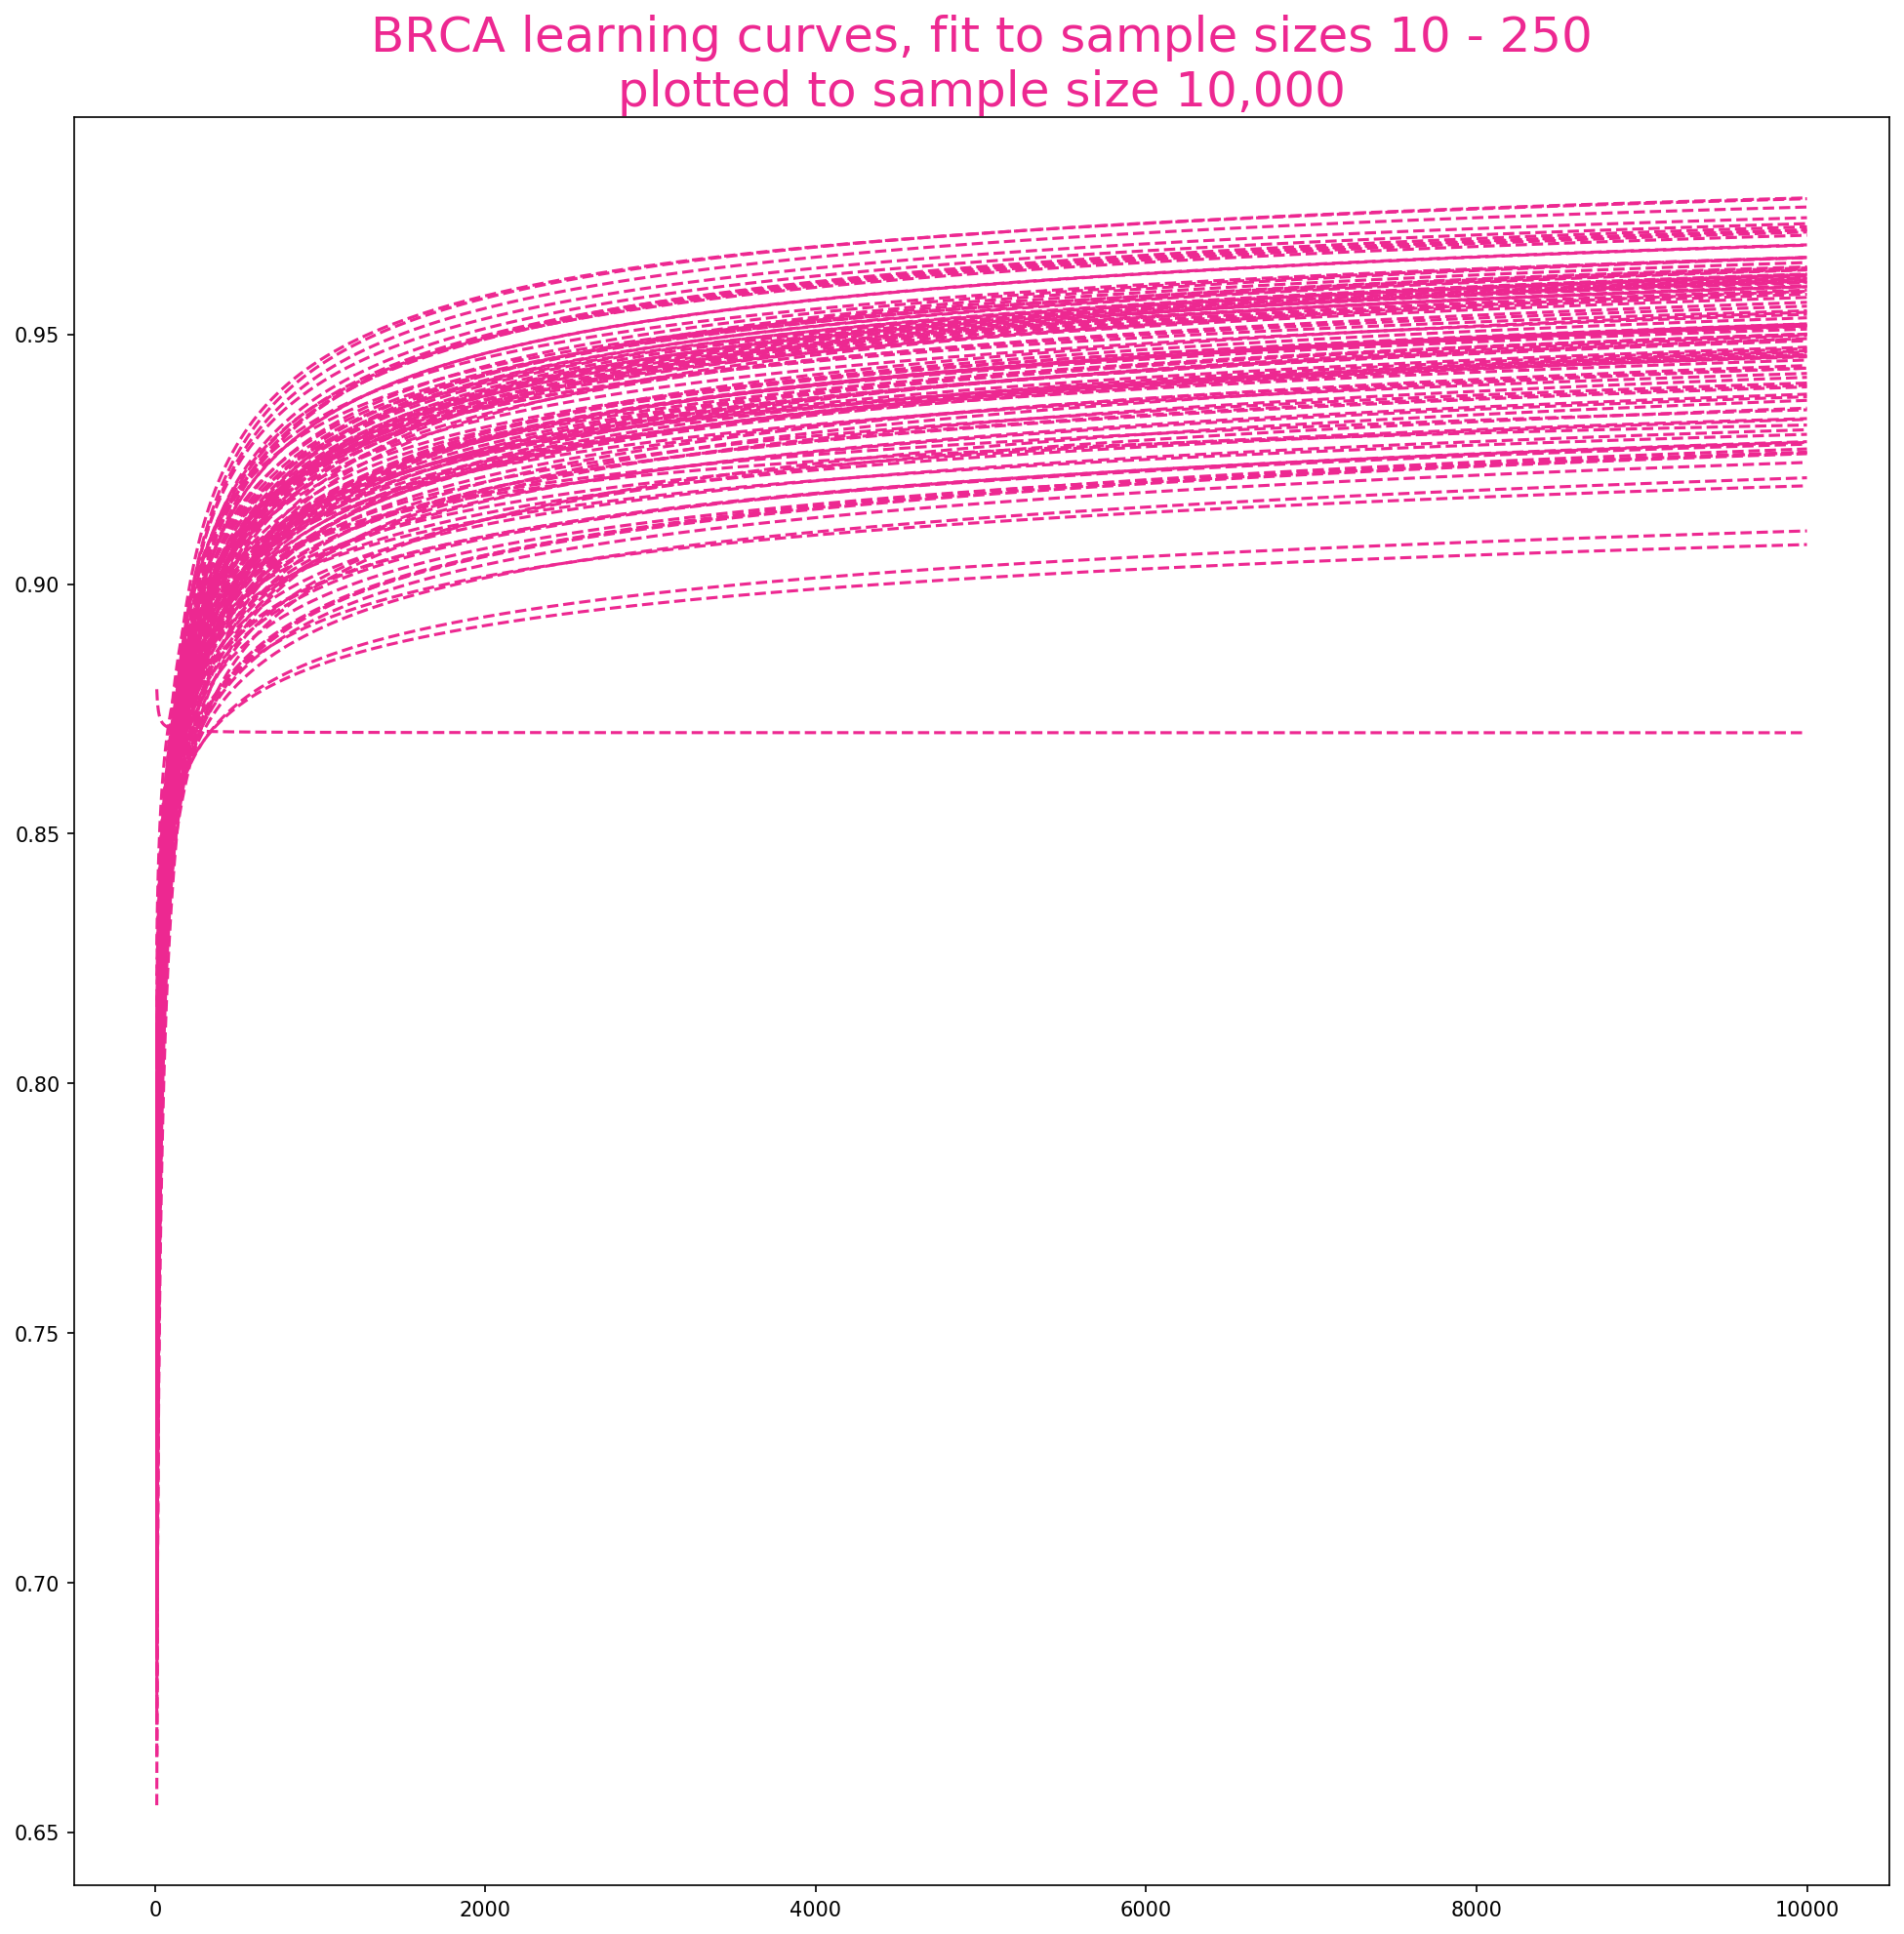

In [17]:
fig, ax = plt.subplots(figsize = (16,16), dpi = 150)
for resampling_idx in list(range(0,100)):
    color_shard = colors[colors.Cohort == cohort]
    colr = color_shard.iloc[0,1]
    
    scores_temp = []
    
    for tuple_n in BRCA_object:
        scores_temp.append(tuple_n[1][resampling_idx])
        
    f, _ = curve_fit(Y_acc,
                     list(BRCA_extract.keys()),
                     scores_temp,
                     bounds=[lower,upper])
    x = np.linspace(10, 10000, 100000)
    y = Y_acc(x, *f)  
    ax.plot(x, y, '--', color=colr)
plt.title(
    'BRCA learning curves, fit to sample sizes 10 - 250\nplotted to sample size 10,000',
    color=colr, fontsize = 24)
plt.savefig('BRCA_to_10,000.png')

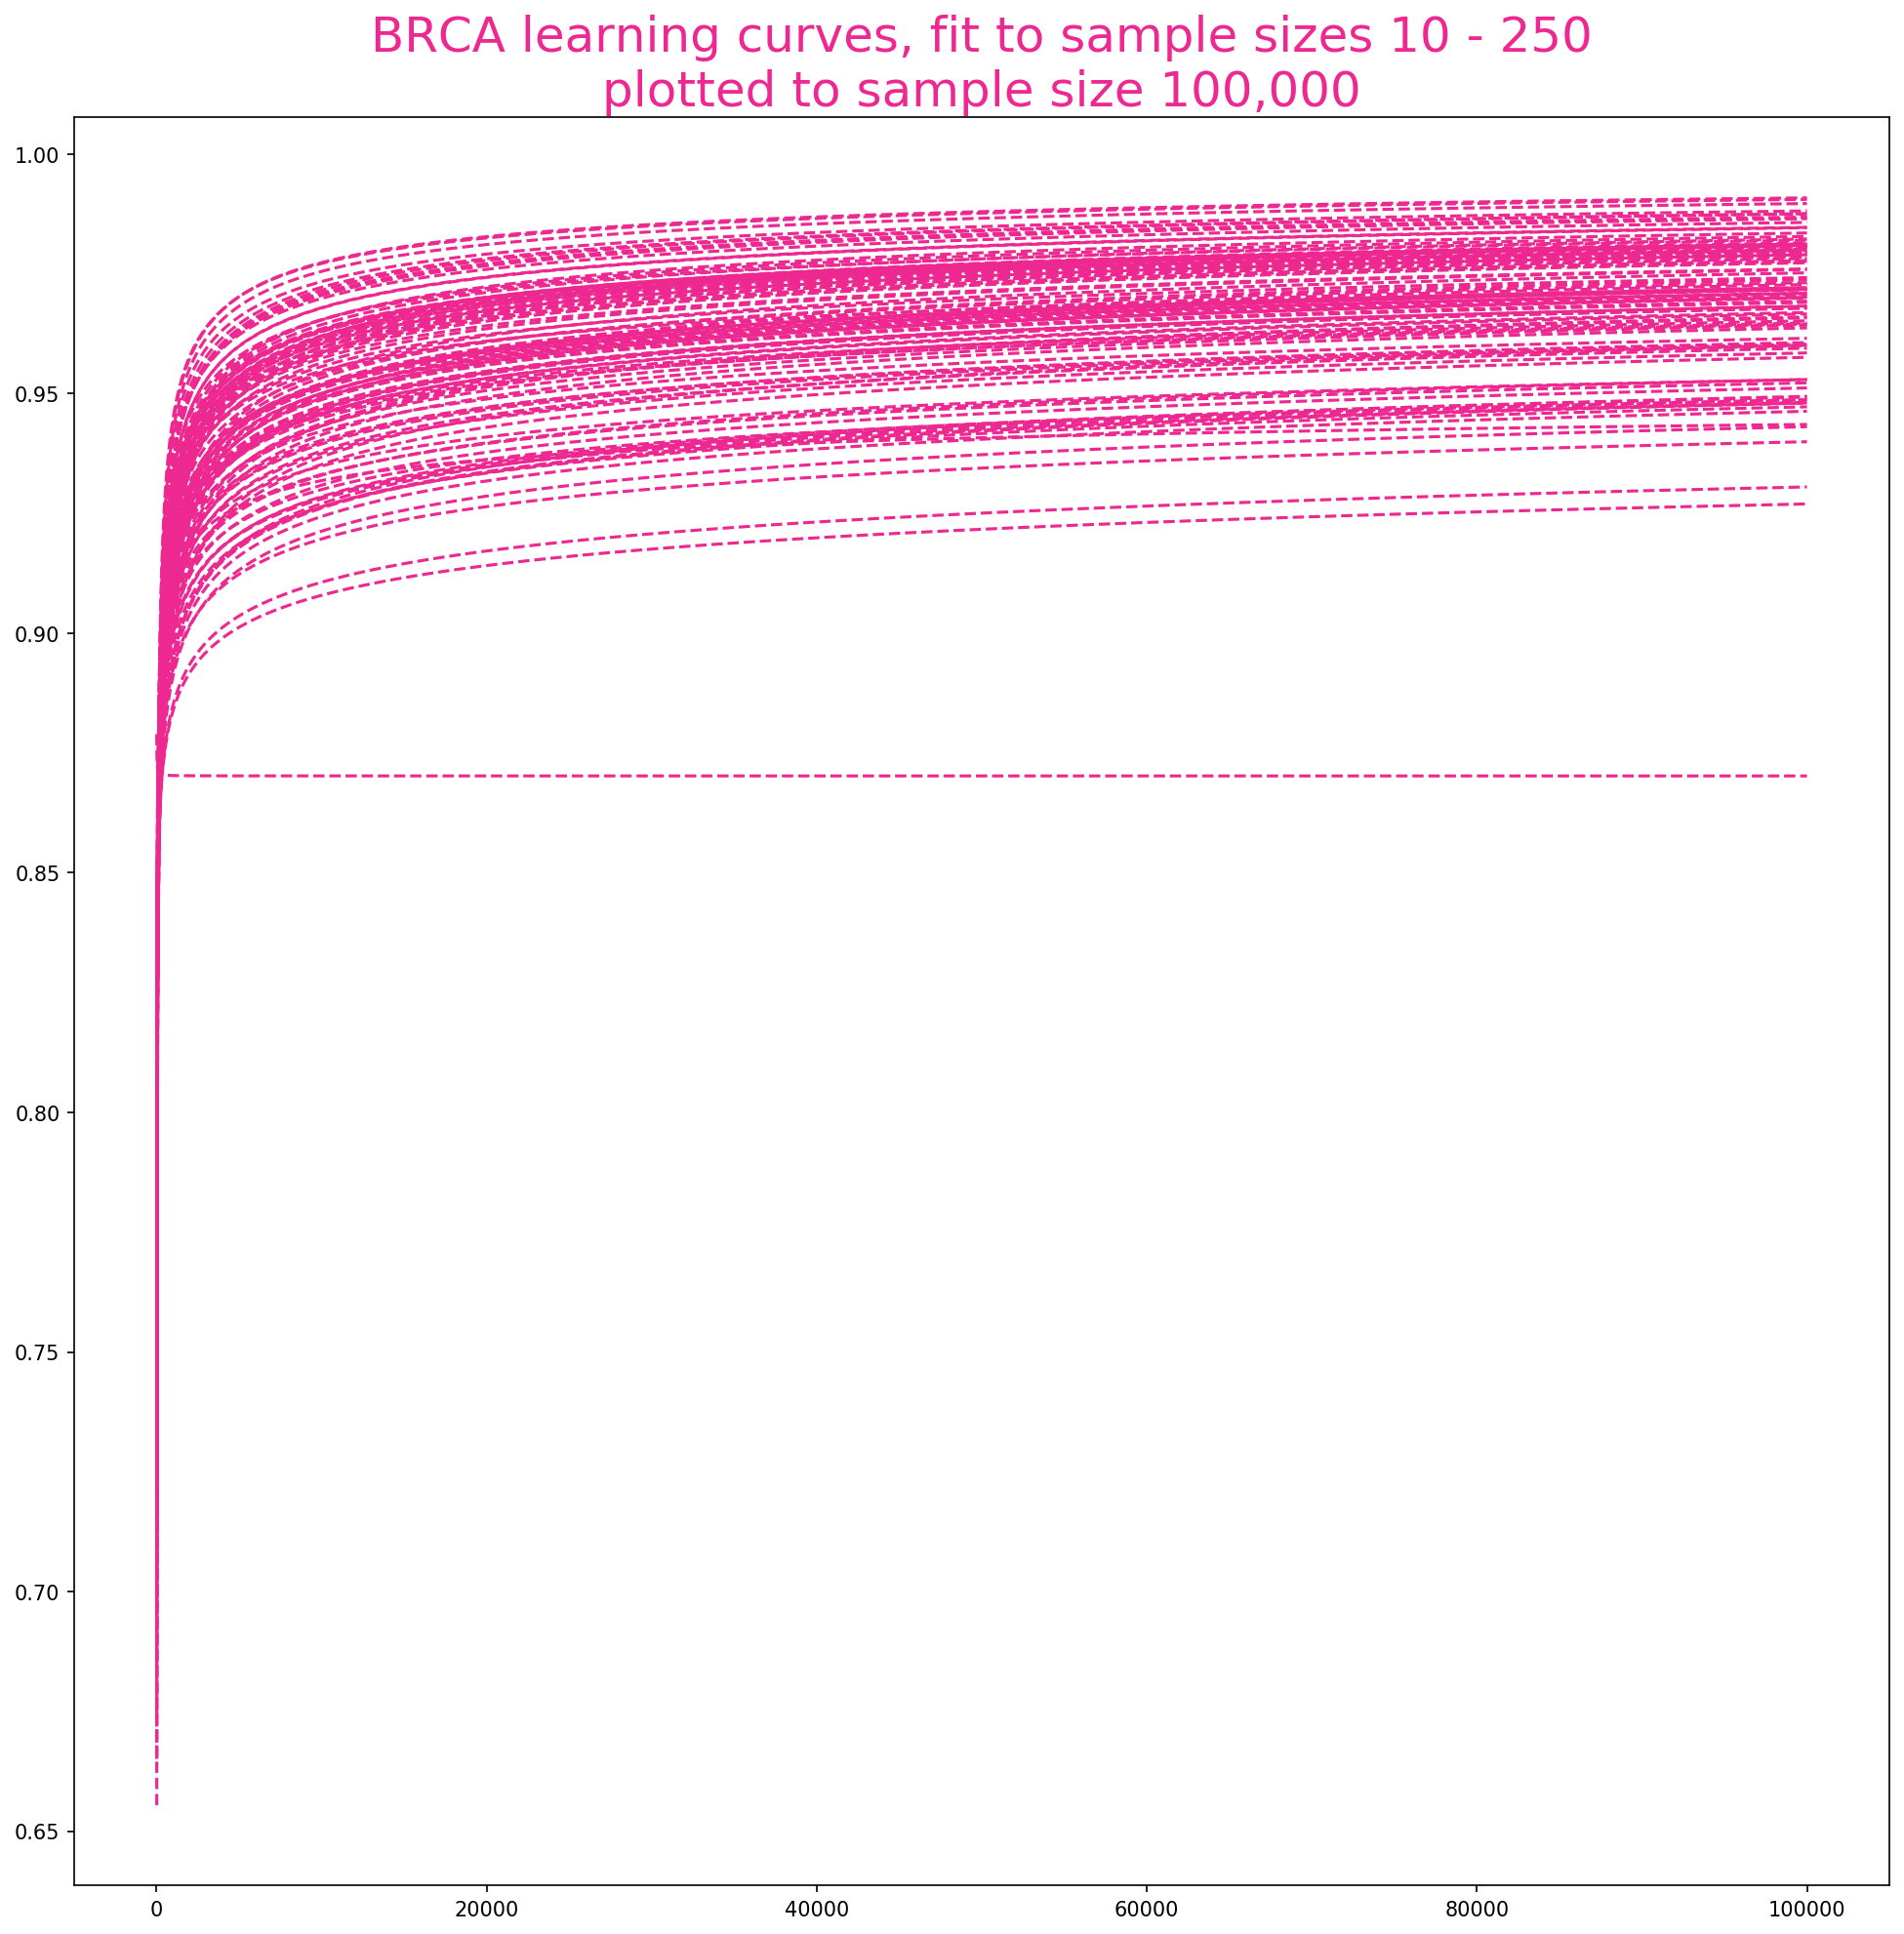

In [19]:
fig, ax = plt.subplots(figsize = (16,16), dpi = 150)
for resampling_idx in list(range(0,100)):
#     print(resampling_idx)
    color_shard = colors[colors.Cohort == cohort]
    colr = color_shard.iloc[0,1]
    
    scores_temp = []
    
    for tuple_n in BRCA_object:
        scores_temp.append(tuple_n[1][resampling_idx])
        
    f, _ = curve_fit(Y_acc,
                     list(BRCA_extract.keys()),
                     scores_temp,
                     bounds=[lower,upper])
    x = np.linspace(10, 100000, 10000)
    y = Y_acc(x, *f)  
    ax.plot(x, y, '--', color=colr)
plt.title(
    'BRCA learning curves, fit to sample sizes 10 - 250\nplotted to sample size 100,000',
    color=colr, fontsize = 24)
plt.savefig('BRCA_to_100,000.png')

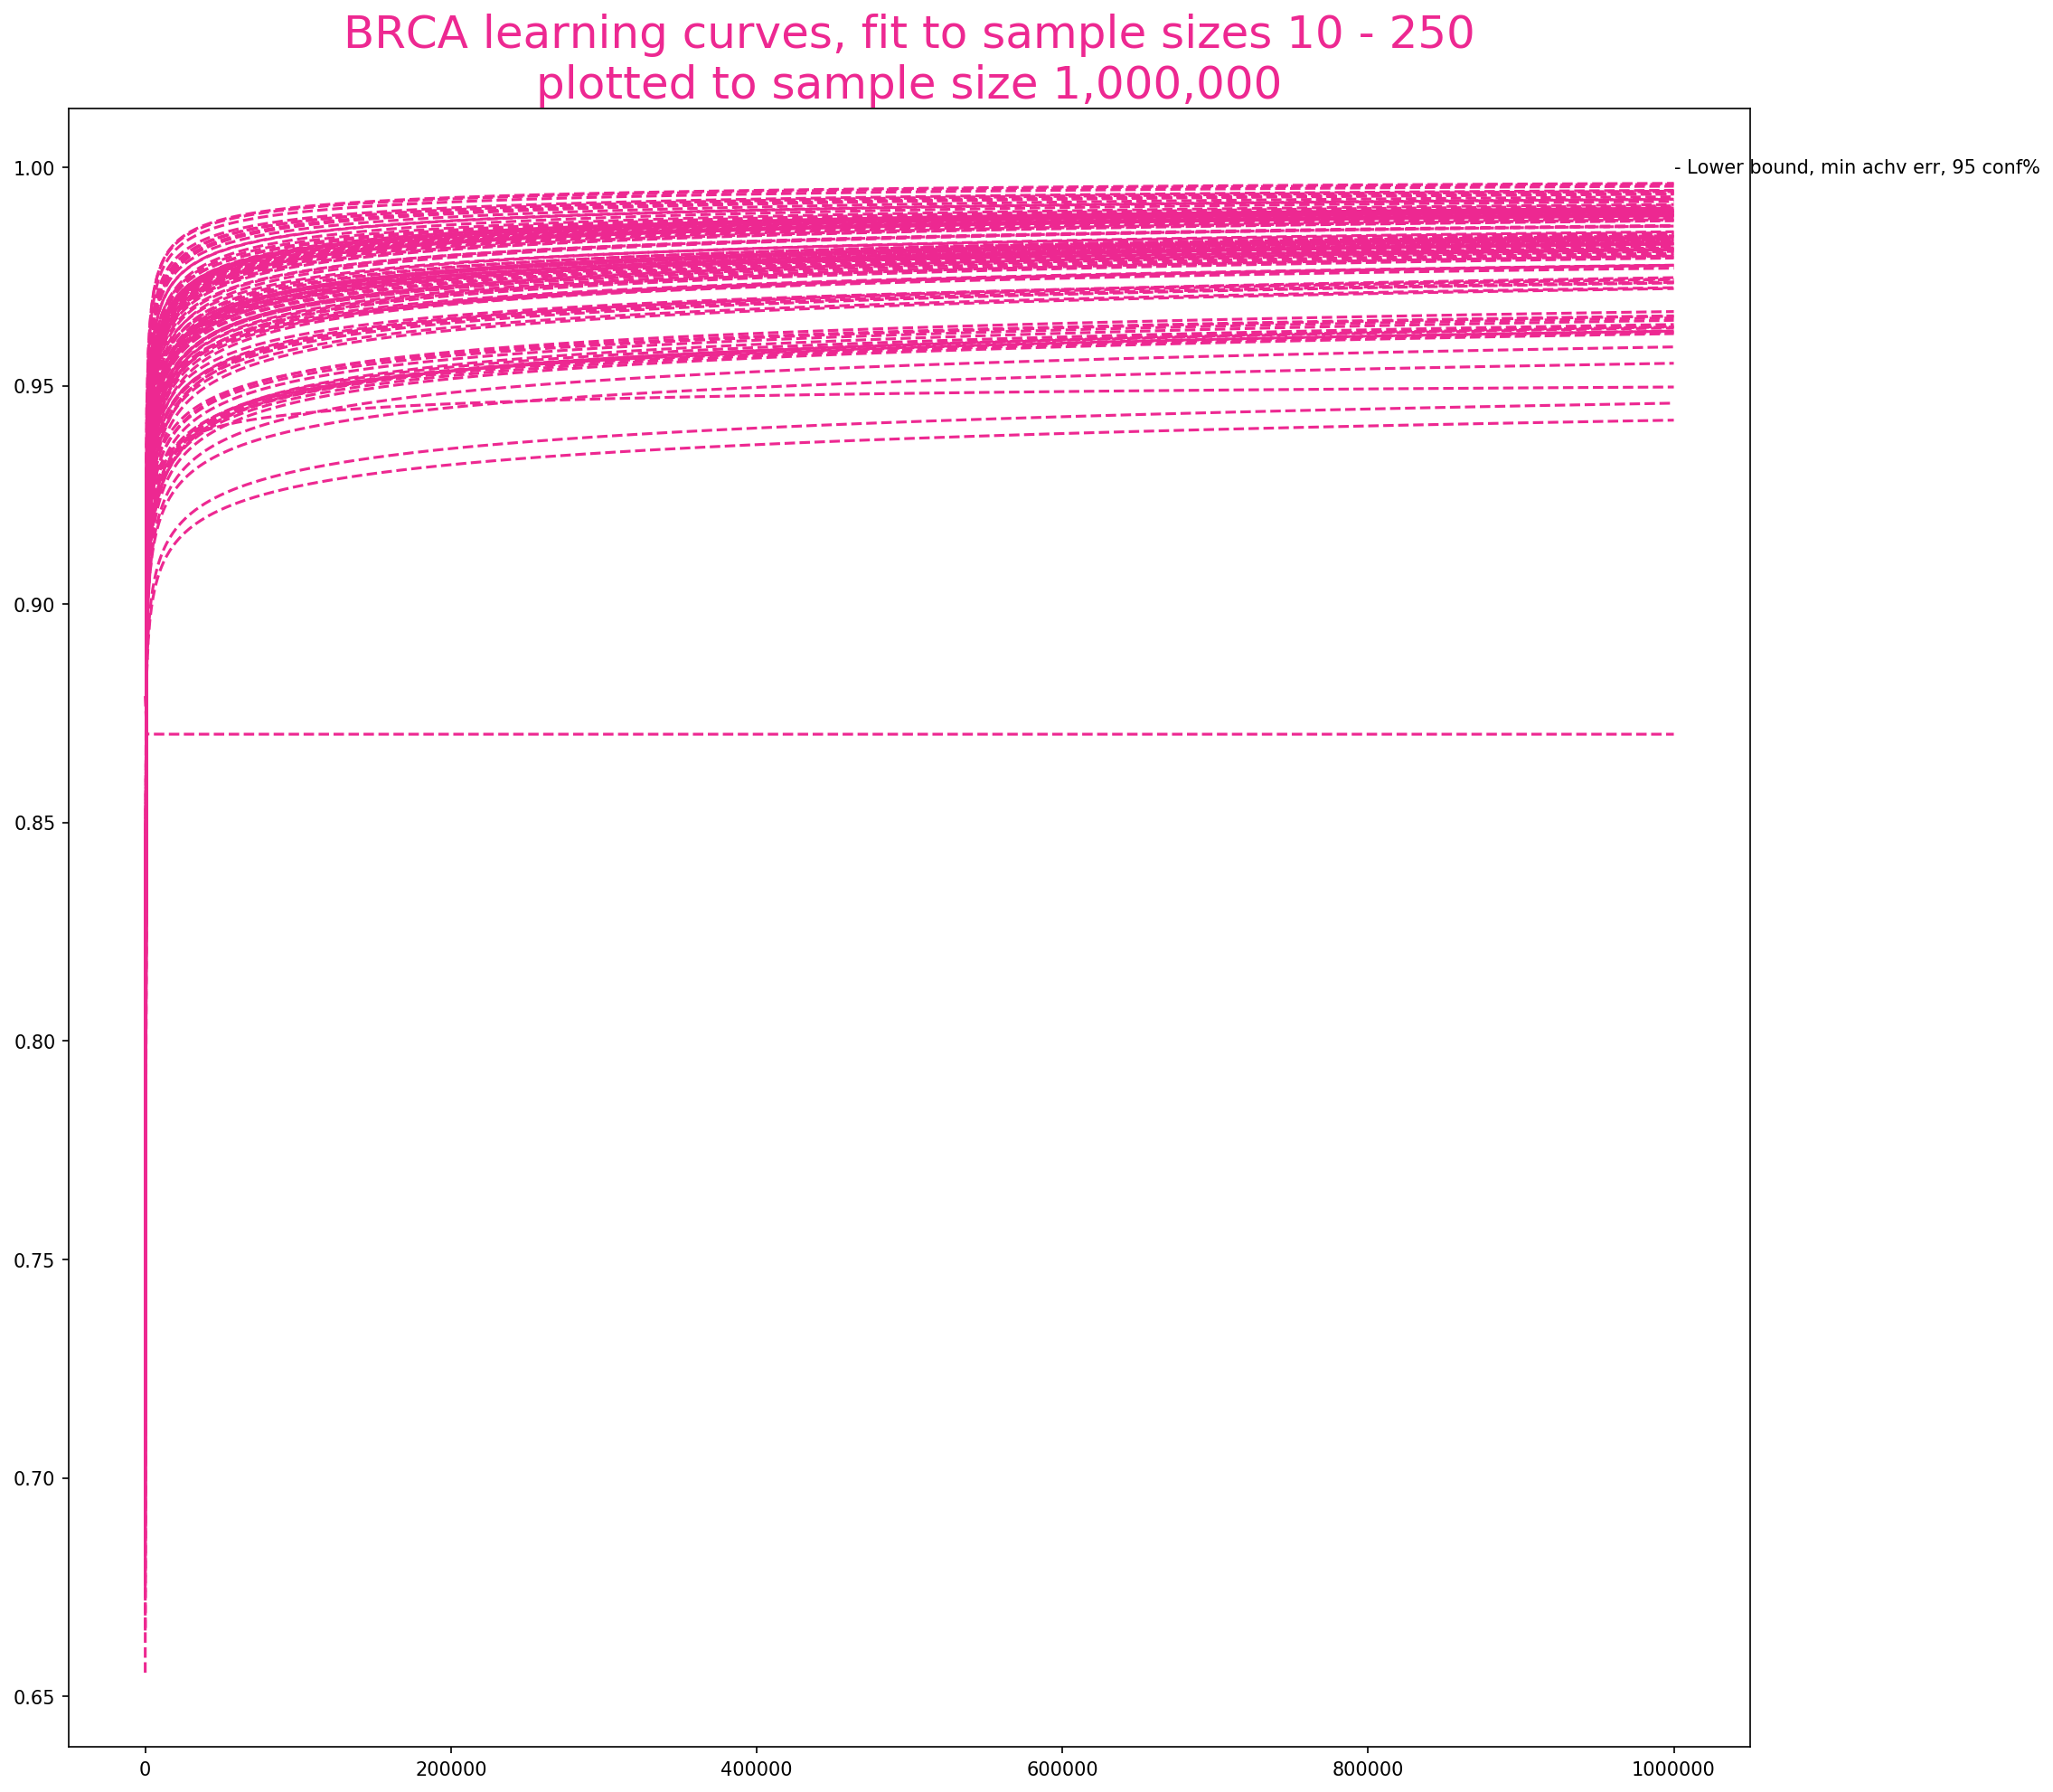

In [25]:
fig, ax = plt.subplots(figsize = (16,16), dpi = 150)
for resampling_idx in list(range(0,100)):
#     print(resampling_idx)
    color_shard = colors[colors.Cohort == cohort]
    colr = color_shard.iloc[0,1]
    
    scores_temp = []
    
    for tuple_n in BRCA_object:
        scores_temp.append(tuple_n[1][resampling_idx])
        
    f, _ = curve_fit(Y_acc,
                     list(BRCA_extract.keys()),
                     scores_temp,
                     bounds=[lower,upper])
    x = np.linspace(10, 1000000, 1000)
    y = Y_acc(x, *f)  
    ax.plot(x, y, '--', color=colr)
ax.text(1000000, .9999552, '- Lower bound, min achv err, 95 conf%', va = 'center')
plt.title(
    'BRCA learning curves, fit to sample sizes 10 - 250\nplotted to sample size 1,000,000',
    color=colr, fontsize = 24)
plt.savefig('BRCA_to_1,000,000.png')

In [ ]:
1+1 # Check if kernel is wrecked

In [ ]:
# Do 70 / 30 split on parameters

In [39]:
# upper_limit = [5,6,7,8,9] template for automation of max sample size for fitting
upper_limit = 5 # Sample size cutoff point
parameter_dict = {} # Parameter dict
for resampling_idx in list(range(0,70)): # toggle for fitting / predicting
    
    scores_temp = []
    
    for tuple_n in BRCA_object:
        scores_temp.append(tuple_n[1][resampling_idx])    
    
    params, _ = curve_fit(Y_acc, # function, good, benchmark with other paper
                     sorted(list(BRCA_extract.keys()))[0:upper_limit], # keys in dict
                     scores_temp[0:upper_limit], # value_index 
                     bounds=[lower,upper])
    parameter_dict[resampling_idx] = params # add to parameter dict
#     if resampling_idx = 70:
#         break
fitDF_restrict = pd.DataFrame(parameter_dict).transpose()
# fitDF.columns = ['a','b','c']
fitDF_restrict.columns = ['Min_achvble_err','Lrn_rate','Dcay_rate']

In [69]:
fitDF_restrict.shape

(70, 3)

In [41]:
fitDF_restrict.head()

,Min_achvble_err,Lrn_rate,Dcay_rate
0,1.810358e-01,1.738076,-1.000000
1,5.000000e-01,-0.614020,-0.213374
2,5.180161e-14,2.788000,-1.000000
3,4.032695e-01,-0.555991,-1.000000
4,3.140626e-01,0.717510,-1.000000


In [45]:
BRCA_lin_reg_predict_a_on_b_and_c = LinearRegression().fit(fitDF_restrict.drop(
    columns = 'Min_achvble_err'),
    fitDF_restrict['Min_achvble_err'])

In [ ]:
# Check X input to linear regression fitting

In [66]:
fitDF_restrict.drop(
    columns = 'Min_achvble_err').head(2)

,Lrn_rate,Dcay_rate
0,1.738076,-1.000000
1,-0.614020,-0.213374


In [68]:
BRCA_lin_reg_predict_a_on_b_and_c = LinearRegression().fit(fitDF_restrict.drop(
    columns = 'Min_achvble_err'),
    fitDF_restrict['Min_achvble_err'])

In [67]:
BRCA_lin_reg_predict_a_on_b_and_c

LinearRegression()

In [52]:
# Now predict; build parameter table on 30% split
upper_limit = 5 # Sample size cutoff point
parameter_dict = {} # Parameter dict
for resampling_idx in list(range(70,100)): # toggle for fitting / predicting (70,100)
    
    scores_temp = []
    
    for tuple_n in BRCA_object:
        scores_temp.append(tuple_n[1][resampling_idx])    
    
    params, _ = curve_fit(Y_acc, # function, good, benchmark with other paper
                     sorted(list(BRCA_extract.keys()))[0:upper_limit], # keys in dict
                     scores_temp[0:upper_limit], # value_index 
                     bounds=[lower,upper])
    parameter_dict[resampling_idx] = params # add to parameter dict
#     if resampling_idx = 70:
#         break
fitDF_restrict_predict = pd.DataFrame(parameter_dict).transpose()
# fitDF.columns = ['a','b','c']
fitDF_restrict_predict.columns = ['Min_achvble_err','Lrn_rate','Dcay_rate']

In [ ]:
# Note, rename fitting frame

In [58]:
fitDF_restrict_predict

,Min_achvble_err,Lrn_rate,Dcay_rate
70,5.483200e-02,4.041985,-1.000000
71,3.407969e-20,0.760761,-0.257353
72,5.514822e-19,1.397384,-0.519196
73,4.759143e-15,1.646203,-0.537609
74,5.921794e-14,2.363894,-0.661087
75,2.032483e-01,1.725534,-1.000000
76,1.577230e-01,2.471117,-1.000000
77,1.816198e-13,1.697136,-0.625703
78,1.290263e-02,0.393711,-0.004661
79,3.532533e-01,-0.085264,-1.000000


In [59]:
np.array(fitDF_restrict_predict)

array([[ 5.48319962e-02,  4.04198544e+00, -1.00000000e+00],
       [ 3.40796861e-20,  7.60760923e-01, -2.57352704e-01],
       [ 5.51482186e-19,  1.39738392e+00, -5.19196476e-01],
       [ 4.75914294e-15,  1.64620324e+00, -5.37608984e-01],
       [ 5.92179449e-14,  2.36389435e+00, -6.61087301e-01],
       [ 2.03248282e-01,  1.72553386e+00, -1.00000000e+00],
       [ 1.57723030e-01,  2.47111720e+00, -1.00000000e+00],
       [ 1.81619796e-13,  1.69713609e+00, -6.25702632e-01],
       [ 1.29026279e-02,  3.93711073e-01, -4.66063267e-03],
       [ 3.53253273e-01, -8.52638776e-02, -1.00000000e+00],
       [ 2.34688218e-21,  4.60931973e+00, -1.00000000e+00],
       [ 1.22766952e-01,  3.22347046e+00, -1.00000000e+00],
       [ 5.00000000e-01, -5.50185850e-01, -3.84122441e-01],
       [ 1.60509490e-01,  2.71779927e+00, -1.00000000e+00],
       [ 1.00211588e-15,  1.75404189e+00, -5.66834658e-01],
       [ 1.61336347e-01,  2.02645924e+00, -1.00000000e+00],
       [ 9.50284740e-13,  4.49026568e-01

In [73]:
fitDF_restrict_predict.drop(
    columns = 'Min_achvble_err').shape

(30, 2)

In [71]:
fitDF_restrict_predict.drop(
    columns = 'Min_achvble_err').head(2)

,Lrn_rate,Dcay_rate
70,4.041985,-1.000000
71,0.760761,-0.257353


In [75]:
BRCA_lin_reg_predict_a_on_b_and_c.predict(
    fitDF_restrict_predict.drop(
    columns = 'Min_achvble_err'))

array([ 2.51478773e-04,  3.41783261e-03,  4.25581718e-02,  2.95217433e-02,
        1.56766678e-02,  1.79488485e-01,  1.21798471e-01,  5.53215369e-02,
       -5.34912615e-02,  3.19600184e-01, -4.36463948e-02,  6.35846290e-02,
        1.47651180e-01,  1.02711278e-01,  3.10443556e-02,  1.56204180e-01,
       -2.80717994e-02,  4.28314555e-01,  2.19598899e-01,  5.76141344e-02,
        1.36657000e-01,  3.76222993e-01, -1.89254346e-02,  3.32829423e-02,
        5.99954292e-02,  5.81736095e-03, -2.73508506e-04,  6.18680028e-02,
        7.09392823e-02,  2.98551273e-01])

In [87]:
a_param_predictions = BRCA_lin_reg_predict_a_on_b_and_c.predict(
    fitDF_restrict_predict.drop(
    columns = 'Min_achvble_err'))

Success, feed to parameter bounds

In [88]:
for i in a_param_predictions:
    print(i)
    lower = [i,-1000,-1]
    upper = [i,1000,0]
    
    
    # Idea: take a third split of data and use average a_param from second split
    # as a bound for generating third parameter table

0.0002514787732695589
0.003417832608800797
0.04255817182231811
0.029521743309286086
0.01567666775700491
0.17948848502226994
0.12179847055243204
0.05532153694343367
-0.053491261512120664
0.3196001836693556
-0.04364639479443885
0.06358462898727052
0.14765118037243624
0.1027112784750126
0.031044355584403188
0.1562041804078758
-0.028071799398685628
0.42831455487150005
0.2195988988397434
0.057614134417781585
0.1366570003327931
0.3762229934001964
-0.018925434591164997
0.03328294234739827
0.05999542921787647
0.005817360946716615
-0.0002735085060794132
0.06186800275323559
0.07093928228366353
0.2985512730907196


In [ ]:
# Fix parameter bounds - in loop?
lower = [0,-1000,-1]
upper = [.5,1000,0]

In [ ]:
# End goal: get a confidence interval on Y_acc values for a number of sample sizes

In [ ]:
BRCA_lin_reg_predict_a_on_b = LinearRegression().fit(fdf_restrict.drop(
    columns = ['Min_achvble_err','Dcay_rate']),
    fdf_restrict['Min_achvble_err'])

In [ ]:
BRCA_lin_reg_predict_a_on_c = LinearRegression().fit(fdf_restrict.drop(
    columns = ['Min_achvble_err', 'Lrn_rate']),
    fdf_restrict['Min_achvble_err'])

In [ ]:
# End predict a_param section using linear regression

In [ ]:
# Begin confidence interval on curve values section

In [92]:
# upper_limit = [5,6,7,8,9] template for automation of max sample size for fitting
upper_limit = 5 # Sample size cutoff point
parameter_dict = {} # Parameter dict
for resampling_idx in list(range(0,100)): # toggle for fitting / predicting lin reg
    
    scores_temp = []
    
    for tuple_n in BRCA_object:
        scores_temp.append(tuple_n[1][resampling_idx])    
    
    params, _ = curve_fit(Y_acc, # function, good, benchmark with other paper
                     sorted(list(BRCA_extract.keys()))[0:upper_limit], # keys in dict
                     scores_temp[0:upper_limit], # value_index 
                     bounds=[lower,upper])
    parameter_dict[resampling_idx] = params # add to parameter dict
fitDF_restrict_curve_CI = pd.DataFrame(parameter_dict).transpose()
# fitDF.columns = ['a','b','c']
fitDF_restrict_curve_CI.columns = ['Min_achvble_err','Lrn_rate','Dcay_rate']

In [93]:
# upper_limit = [5,6,7,8,9] # template for automation of max sample size for fitting
upper_limit = 5
y_save = []
for resampling_idx in list(range(0,100)):
    color_shard = colors[colors.Cohort == cohort]
    colr = color_shard.iloc[0,1]
    
    scores_temp = []
    
    for tuple_n in BRCA_object:
        scores_temp.append(tuple_n[1][resampling_idx])
        
    f, _ = curve_fit(Y_acc,
                     sorted(list(BRCA_extract.keys()))[0:upper_limit],
                     scores_temp[0:upper_limit],
                     bounds=[lower,upper])
    x = 250
    y = Y_acc(x, *f)  
    y_save.append(y)

In [100]:
pwd

'/Users/karlberb/work/tmp/sample_response_reproduce/confidence_interval'

In [94]:
y_save

[0.8120119193899036,
 0.6890270159459633,
 0.9888479980783688,
 0.5989544681938989,
 0.6830673977741522,
 0.8974683425228539,
 0.9145907823153584,
 0.843409789248428,
 0.6412348883284672,
 0.9025630182449966,
 0.9325267277877235,
 0.9077225461985576,
 0.9224385902408384,
 0.9200109633054062,
 0.9775580137825125,
 0.793138984842572,
 0.7980891234859053,
 0.9492854082984727,
 0.9876624021379677,
 0.980734014860731,
 0.8894437947769995,
 0.9353941867720473,
 0.9076188030528803,
 0.9611059596073865,
 0.6729081847078865,
 0.7829334858165464,
 0.9305516377858132,
 0.8506263590491685,
 0.8414520807993497,
 0.7381172899587269,
 0.9292786210215704,
 0.902214264189023,
 0.7861896724608121,
 0.654943250586685,
 0.982887259343564,
 0.7849046367955025,
 0.8500202600510162,
 0.8834598933646849,
 0.8384726994333773,
 0.7557853598241685,
 0.8818367789560988,
 0.9166156650155604,
 0.7089638745227236,
 0.8331464752424247,
 0.9128043906846174,
 0.9189363508255806,
 0.5752235554163443,
 0.7130221431822753

In [95]:
xbar = mean(y_save)
z = 1.96 
s = statistics.stdev(y_save)
n = len(y_save)
CI_upper = xbar + z * (s/math.sqrt(n))
CI_lower = xbar - z * (s/math.sqrt(n))
print(xbar)
print(CI_upper, CI_lower)

0.8431773757824189
0.8649444149370134 0.8214103366278245


In [98]:
upper_limit_list = [5,6,7,8,9] # template for automation of max sample size for fitting
Confidence_list = []
for i in upper_limit_list:
    upper_limit = i
    y_save = []
    for resampling_idx in list(range(0,100)):
        color_shard = colors[colors.Cohort == cohort]
        colr = color_shard.iloc[0,1]

        scores_temp = []

        for tuple_n in BRCA_object:
            scores_temp.append(tuple_n[1][resampling_idx])

        f, _ = curve_fit(Y_acc,
                         sorted(list(BRCA_extract.keys()))[0:upper_limit],
                         scores_temp[0:upper_limit],
                         bounds=[lower,upper])
        x = 250
        y = Y_acc(x, *f)  
        y_save.append(y)

    xbar = round(mean(y_save), 3)
    z = 1.96 
    s = statistics.stdev(y_save)
    n = len(y_save)
    CI_upper = xbar + z * (s/math.sqrt(n))
    CI_lower = xbar - z * (s/math.sqrt(n))
    plus_minus = round(z * (s/math.sqrt(n)), 3)
    CI_tup = (xbar, plus_minus)
    
    Confidence_list.append(CI_tup)

In [99]:
Confidence_list

[(0.843, 0.022),
 (0.855, 0.018),
 (0.865, 0.015),
 (0.878, 0.012),
 (0.882, 0.011)]

In [128]:
# For threshold point (upper_limit) on front-end of curve, plot multiple predicted values

prediction_sample_sizes = [100,150,200,350,400,450,500]
counts = list(i[0] for i in accuracy_response)
Confidence_list = []
for sample_size_to_predict in prediction_sample_sizes:
    upper_limit = 6 # Toggle threshold by cohort (?)
    y_save = []
    for resampling_idx in list(range(0,100)):
        color_shard = colors[colors.Cohort == cohort]
        colr = color_shard.iloc[0,1]

        scores_temp = []

        for tuple_n in accuracy_response:
            scores_temp.append(tuple_n[1][resampling_idx])

        f, _ = curve_fit(Y_acc,
                         counts[0:upper_limit],
                         scores_temp[0:upper_limit],
                         bounds=[lower,upper])
        x = sample_size_to_predict
        y = Y_acc(x, *f)  
        y_save.append(y)

    xbar = round(mean(y_save), 3)
    z = 1.96 
    s = statistics.stdev(y_save)
    n = len(y_save)
    CI_upper = xbar + z * (s/math.sqrt(n))
    CI_lower = xbar - z * (s/math.sqrt(n))
    plus_minus = round(z * (s/math.sqrt(n)), 3)
    CI_tup = (xbar, plus_minus)
    
    Confidence_list.append(CI_tup)

In [129]:
Confidence_list

[(0.832, 0.016),
 (0.844, 0.017),
 (0.851, 0.017),
 (0.861, 0.018),
 (0.863, 0.018),
 (0.865, 0.019),
 (0.866, 0.019)]

In [144]:
# Step one to automate
accuracy_response = BRCA_object
cohort = 'BRCA'

Fit range on front of curve: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]


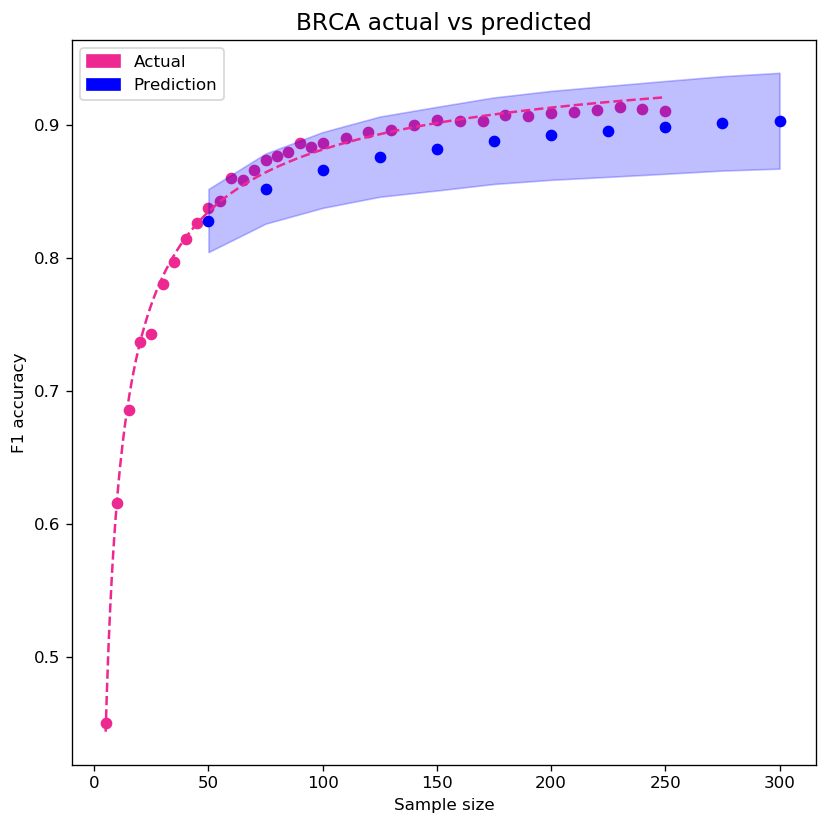

In [181]:
# For threshold point on front-end of curve, plot multiple predicted values
prediction_sample_sizes = [50,75,100,125,150,175,200,225,250,275,300] # template for automation of max sample size for fitting
counts = list(i[0] for i in accuracy_response)
confidence = []
predictions = []
conf_95 = []
conf_90 = []
CI_upper = []
CI_lower = []
stdev = []
stdev_upper = []
stdev_lower = []

sampling_threshold = 12 # Toggle threshold by cohort?
print('Fit range on front of curve: ' + str(counts[0:sampling_threshold]))
actual = []
for i in accuracy_response:
    actual.append(mean(i[1]))
for sample_size_to_predict in prediction_sample_sizes:
    y_save = []
    for resampling_idx in list(range(0,100)):
        color_shard = colors[colors.Cohort == cohort]
        colr = color_shard.iloc[0,1]

        scores_temp = []

        for tuple_n in accuracy_response:
            scores_temp.append(tuple_n[1][resampling_idx])

        f, _ = curve_fit(Y_acc,
                         counts[0:sampling_threshold],
                         scores_temp[0:sampling_threshold],
                         bounds=[lower,upper])
        x = sample_size_to_predict
        y = Y_acc(x, *f)  
        y_save.append(y)

    xbar = round(mean(y_save), 3)
    z = 1.96 # 95%
    z_sandbag = 1.645 # 90
    s = statistics.stdev(y_save)
    stdev_upper.append(xbar+s)
    stdev_lower.append(xbar-s)
#     n = len(y_save)
    n = 100
    CI_up = xbar + z * (s/math.sqrt(n))
    CI_upper.append(CI_up)
    CI_low = xbar - z * (s/math.sqrt(n))
    CI_lower.append(CI_low)
    plus_minus_95 = round(z * (s/math.sqrt(n)), 3)
    plus_minus_90 = round(z_sandbag * (s/math.sqrt(n)), 3)
    
    CI_tup = (xbar, plus_minus)
    
    confidence.append(CI_tup)
    predictions.append(xbar)
    conf_95.append(plus_minus_95)
    conf_90.append(plus_minus_90)
    stdev.append(s)
    
color_shard = colors[colors.Cohort == cohort]
colr = color_shard.iloc[0,1]

fig, ax = plt.subplots(figsize = (8,8), dpi = 120)

# Plot actual average scores
ax.scatter(counts, actual, color=colr)

# Plot inverse power curve of actual
f, _ = curve_fit(Y_acc, counts, actual, bounds=[lower,upper])
x = np.linspace(5, 250, 1000)
y = Y_acc(x, *f)  
ax.plot(x, y, '--', color=colr)

# Plot predicted based on front end of curve

ax.scatter(prediction_sample_sizes, predictions,
          color = 'blue')

# ax.errorbar(prediction_sample_sizes,
#             predictions,
#             yerr=stdev # or conf_95
# #             yerr = conf_90
#            )

# ax.fill_between(prediction_sample_sizes,
#             CI_upper,
#             CI_lower, # or conf_95
# #             yerr = conf_90
#            alpha = .5)

ax.fill_between(prediction_sample_sizes,
            stdev_upper,
            stdev_lower, # or conf_95
#             yerr = conf_90
            alpha = .25, color = 'blue')


ax.set_xlabel('Sample size')
ax.set_ylabel('F1 accuracy')
plt.title(cohort +
    ' actual vs predicted',
    fontsize = 14)
patch_1 = mpatches.Patch(color=colr, label='Actual')
patch_2 = mpatches.Patch(color='blue', label='Prediction')
plt.legend(handles=[patch_1, patch_2])
plt.show()
# plt.savefig(cohort + '_predict.png')

In [164]:
confidence

[(0.822, 0.01),
 (0.845, 0.01),
 (0.858, 0.01),
 (0.866, 0.01),
 (0.873, 0.01),
 (0.877, 0.01),
 (0.881, 0.01),
 (0.884, 0.01),
 (0.887, 0.01),
 (0.889, 0.01),
 (0.891, 0.01)]

In [142]:
# Plot actual (with error ?) and prediction with error
actual = []
for i in accuracy_response:
#     print(i)
    actual.append(mean(i[1]))

In [ ]:
# End confidence interval on curves

In [ ]:
# Begin predict y using lin reg on all three params (oringal method, now with CI)

In [ ]:
hold

In [ ]:
# Notes:

In [ ]:
# Can 1) predict multiple bigger sample accuracies
# 2) predict single bigger sample size on increasing segments of front end of curve
# 3)

In [ ]:
# no sample count associated with min_achv_err

In [ ]:
# Lin reg notes
store_lin_reg_output.append(
    round(
        BRCA_lin_reg.predict(
            np.array(fdf5.loc[cohort]).reshape(1, -1))[0], 3))

In [ ]:
https://www.liebertpub.com/doi/pdf/10.1089/106652703321825928